<a href="https://colab.research.google.com/github/sbuitragoo/UN-Subjects/blob/main/Se%C3%B1alesySistemas/Taller_3SyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Señales y Sistemas - Taller 3

## Santiago Buitrago Osorio

## 1. Respuesta al Impulso
Ejercicios:

* Compare la señal de salida obtenida al resolver la EDO con la obtenida mediante la convolución. Son iguales?
* Compruebe la solución $h(t)$ de la EDO cuando $x(t)=\delta(t)$ de manera manual. Tener en cuenta que $\frac{d}{dt} \epsilon(t) = \delta(t)$.
* Comprobar la solución de la integral de convolución de manera manual. Tener en cuenta las funciones Heaviside.

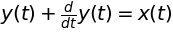

In [ ]:
#Definición de la EDO
%matplotlib inline
import sympy as sym
sym.init_printing()

t = sym.symbols('t', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)

ode = sym.Eq(y + y.diff(t) , x)
ode

In [ ]:
#Solución
solution = sym.dsolve(ode.subs(x, sym.exp(-2*t)*sym.Heaviside(t)))
integration_constants = sym.solve( (solution.rhs.limit(t, 0, '-'), solution.rhs.diff(t).limit(t, 0, '-')), 'C1' )
y1 = solution.subs(integration_constants)
y1

In [ ]:
#Respuesta al impulso.

h = sym.Function('h')(t)
solution2 = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, h))
integration_constants = sym.solve( (solution2.rhs.limit(t, 0, '-'), solution2.rhs.diff(t).limit(t, 0, '-')), 'C1' )
h = solution2.subs(integration_constants)
h

In [ ]:
#Convolución
tau = sym.symbols('tau', real=True)

y2 = sym.integrate(sym.exp(-2*tau) * h.rhs.subs(sym.Heaviside(t), 1).subs(t, t-tau), (tau, 0, t))
y2

## Solución:

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


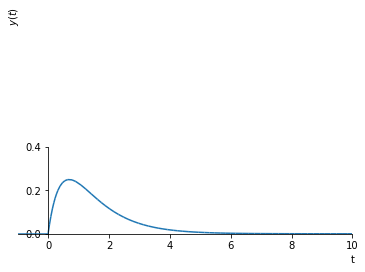

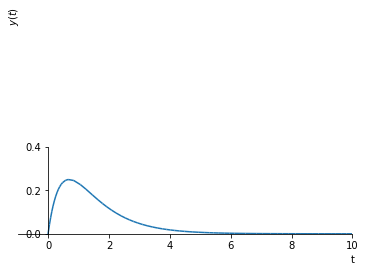

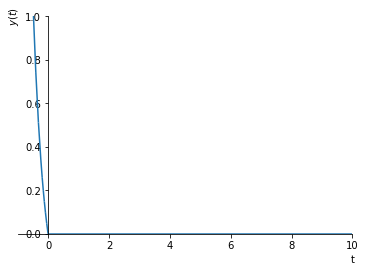

In [ ]:
#Comparación:

sym.plot(y1.rhs, (t,-1,10), ylabel=r'$y(t)$');

sym.plot(y2, (t,-1,10), ylabel=r'$y(t)$');

sym.plot(y1.rhs-y2, (t,-1,10), ylabel=r'$y(t)$');

Como se puede observar, las señales son iguales desde $t \geq 0$, para $t \leq 0$ la señal $y_1$ tiene un valor de 0, pero la señal $y_2$ no tiene ningún valor, ya que esta inicia desde 0.

## 2. Respuesta al escalon:

Este cuaderno no posee ejercicios.

## 3. Autofunciones:

Ejercicios:

* Introduzca $x(t)=e^{s t} $ y $y(t)=\lambda \cdot e^{st}$ en la EDO y calcule manualmente el valor propio $\lambda$. ¿Cómo se relaciona el resultado con el resultado anterior al resolver la EDO?
* Puede generalizar sus resultados a una EDO de orden arbitrario?

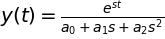

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t, s, a0, a1, a2 = sym.symbols('t s a:3')
x = sym.exp(s * t)
y = sym.Function('y')(t)

ode = sym.Eq(a0*y + a1*y.diff(t) + a2*y.diff(t,2), x)
solution = sym.dsolve(ode)
solution.subs({'C1': 0, 'C2' : 0})

## 4. Red Eléctrica:

Este cuaderno no tiene ejercicios.

## 5. Pendulo Elástico:

1. Ejercicios:

* Cambie el coeficiente de amortiguamiento $c$ del péndulo elástico e indique cómo cambia la magnitud y la fase de la función de transferencia $H(j\omega)$.

* Qué relación hay entre la frecuencia de oscilación y las frecuencias de resonancia?

2. Ejercicios: 
* Calcule y grafique el desplazamiento para valores dados de $m_\text{I}$ y $r$.

* ¿Para qué frecuencias angulares $\omega$ se tiene una mayor magnitud del desplazamiento? ¿Cómo es la relación de fase entre la fuerza externa $F_\text{E}(t)$ y el desplazamiento $y(t)$ en estas frecuencias?

* ¿Cómo deben elegirse las frecuencias de resonancia $\omega_0$ del péndulo de resorte para obtener un buen aislamiento de vibraciones para una máquina que gira con frecuencia angular $\omega$? ¿Cómo es la relación de fase entre la fuerza externa $F_\text{E}(t) $ y el desplazamiento $y(t)$ a esta frecuencia?


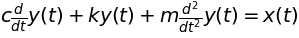

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t, m, c, k = sym.symbols('t m c k', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)

ode = sym.Eq(m*y.diff(t, 2) + c*y.diff(t) + k*y, x)
ode

In [ ]:
mck = {m: 0.1, c: sym.Rational('.5'), k: sym.Rational('2.5')}
mck

In [ ]:
integration_constants = sym.solve( (solution_h.rhs.limit(t, 0, '-'), solution_h.rhs.diff(t).limit(t, 0, '-')), ['C1', 'C2'] )
integration_constants

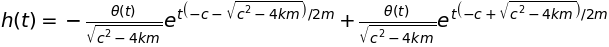

In [ ]:
h = solution_h.subs(integration_constants)
h

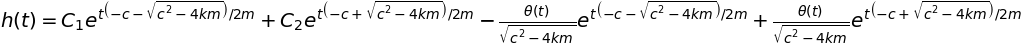

In [ ]:
solution_h = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, sym.Function('h')(t)))
solution_h

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


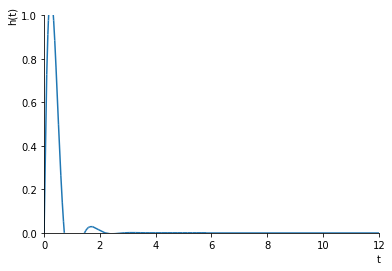

In [ ]:
sym.plot(h.rhs.subs(mck), (t,0,12), ylabel=r'h(t)');

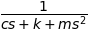

In [ ]:
#Función de transferencia
s = sym.symbols('s')
H = sym.Function('H')(s)

H, = sym.solve(ode.subs(x, sym.exp(s*t)).subs(y, H*sym.exp(s*t)).doit(), H)
H

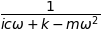

In [ ]:
w = sym.symbols('omega', real=True)

Hjw = H.subs(s, sym.I * w)
Hjw

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


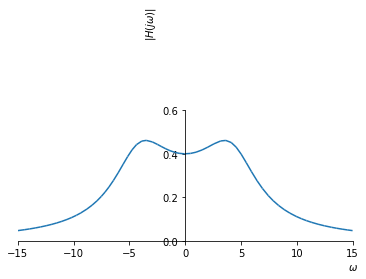

In [ ]:
sym.plot(abs(Hjw.subs(mck)), (w, -15, 15), ylabel=r'$|H(j \omega)|$', xlabel=r'$\omega$');

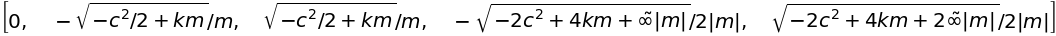

In [ ]:
extrema = sym.solve(sym.Eq(sym.diff(abs(Hjw), w),0),w)
extrema

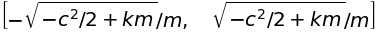

In [ ]:
w0 = extrema[1:3]
w0

In [ ]:
[w00.subs(mck) for w00 in w0]

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


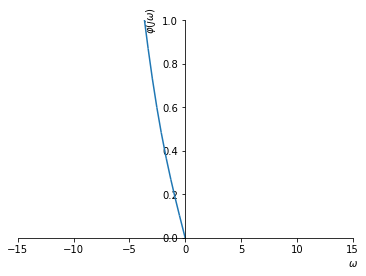

In [ ]:
phi = sym.arg(Hjw)
sym.plot(phi.subs(mck), (w, -15, 15), ylabel=r'$\varphi(j \omega)$', xlabel=r'$\omega$');

# Solución:

* Al aumentar el coeficiente de amortiguamiento $c$ la magnitud de la función de transferencia disminuye, se acota.

# Simulaciones del taller

## 4. Para las funciones de transferencia encontradas en el punto anterior, encuentre la expresión de salida en el tiempo, en función de R, L, C y las condiciones iniciales para las siguientes entradas: $i)$Impulso, $ii)$ Escalon unitario, y $iii)$ Rampa. Compruebe los resultados en simulación sobre Python y grafique la señal de salida para cada caso.

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()

S = sym.symbols('S', complex=True)
t = sym.symbols('t', real=True)

RLC serie:

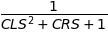

In [ ]:
t, R, L, C = sym.symbols('t R L C', positive=True)

H = 1/((L*C*S**2)+R*C*S+1)
H

$i)$ Respuesta al impulso

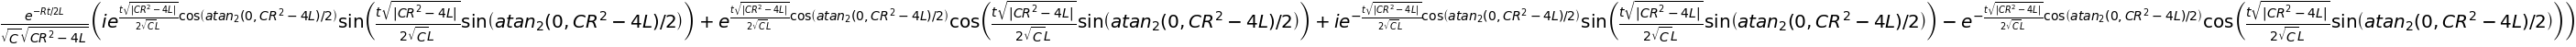

In [ ]:
a = sym.inverse_laplace_transform(H, S, t)
a

$ii)$ Respuesta al escalón unitario:

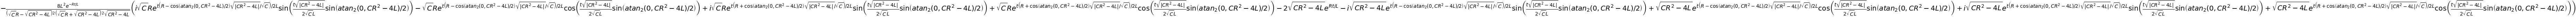

In [ ]:
sym.inverse_laplace_transform(H*(1/S), S, t)

$iii)$ Respuesta a la rampa:

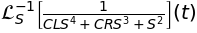

In [ ]:
sym.inverse_laplace_transform(H*(1/S**2), S, t)